# Résolution d'Équations aux Dérivées partielles III

Objectifs :

- Résolution théorique de l'équation de transport linéaire à coefficient constant sur $\mathbb R$ et sur $[0,1]$.

- Schéma numérique par différences finies, avec dérivée en espace décentrée en amont. Stabilité si la condition CFL est remplie.

- Mise en évidence de l'instabilité numérique du schéma avec dérivées en espace décentrées en aval, quelques soient les pas d'espace et de temps.

## L'équation de transport lineaire a coefficient constant

### Résolution théorique

Pour $c\in \mathbb R$ on considère l'équation de transport linéaire à vitesse constante sur $\mathbb R$ :
$$
(1)\qquad \qquad \left\{ \begin{array}{l l}
\frac{\partial u}{\partial t} (x,t)+ c \frac{\partial u}{\partial x}(x,t)=0, \qquad \forall (x,t)\in \mathbb R\times (0,\infty)\\
u(x,0)=u_0(x) , \qquad \forall x\in \mathbb R \\
\end{array} \right.
$$
On a le résultat théorique suivant :

__Proposition 1.__ Soit $u_0\in C^1(\mathbb R)$. Alors il existe une unique fonction $u\in C^1(\mathbb R\times [0,\infty))$ qui est solution de (1), et elle est donnée par la formule
$$
(2) \qquad \qquad u(t,x)=u_0(x-ct).
$$

__Remarque 2.__ Une équation de transport modélise le phénomène d'advection. Ici, par (2), on constate qu'à l'instant $t$, la solution $x\mapsto u(t,x)=u_0(x-ct)$ est la donnée initiale $u_0$ que l'on a translaté en espace de $ct$. La solution se déplace donc à vitesse $c$.

__Preuve.__ Montrons tout d'abord que (2) est bien une solution. On calcule par (2) et en dérivant une composée de fonction que
$$
\frac{\partial }{\partial t} u(t,x)=-c\frac{d}{dx}u_0(x-ct) \qquad \mbox{et} \qquad \frac{\partial }{\partial x} u(t,x)=\frac{d}{dx}u_0(x-ct).
$$
Donc $\frac{\partial u}{\partial t} (x,t)+ c \frac{\partial u}{\partial x}(x,t)=-c\frac{d}{dx}u_0(x-ct)+c\frac{d}{dx}u_0(x-ct=0$, et $u$ résout la première équation de (1). On a à $t=0$ par (2) que $u(0,x)=u_0(x)$ et donc la deuxième équation de (1) est satisfaite.

Montrons maintenant que toute solution $u\in C^{1}(\mathbb R\times [0,\infty)$ de (1) est donnée par (2). L'idée est de voir $u$ comme une fonction sur $\mathbb R^2$, et d'interpréter le membre de gauche de la première équation de (1) comme la dérivée dans la direction (1,c). Pour $x\in \mathbb R$ fixé on définit la ligne caractéristique de (1) partant de $x$ à $t=0$ comme étant la solution $y=y(t,x)$ de
$$
\frac{d}{dt} y = c, \qquad y(0)=x.
$$
Cette équation est appelée équation caractéristique, elle se généralise au cas où $c$ dépendrait de $x$ ou de $u$, voir la dernière section. Sa solution est $y=x+ct$. On pose alors $z(t)=u(y(t),t)=u(x+ct,t)$. Alors
$$
\frac{d}{dt} z(t)= \frac{\partial u}{\partial t} (y(t),t)+ c \frac{\partial u}{\partial x}(y(t),t)=0
$$
par (1). Donc $z(t)=z(0)$. Comme $z(t)=u(x+ct,t)$ d'une part, et $z(0)=u(x,0)=u_0(x)$ d'autre part par la deuxième ligne de (1), on conclut que $u(x+ct,t)=u_0(x)$. En faisant le changement de variable $x\mapsto x-ct$ cette formule donne bien (2). 

On considère maintenant l'équation sur le segment $[a,b]$. Si $c>0$ la solution se déplace vers la droite (on a cette intuition par la Proposition 1), et si $c<0$ vers la gauche. Il faut donc prescrire quelle est la valeur de la solution qui rentre dans $[a,b]$. On ajoute ainsi une condition au bord de Dirichlet en $a$ si $c>0$, et en $b$ si $c<0$. Pour $c>0$ cela donne
$$
(3)\qquad \qquad \left\{ \begin{array}{l l}
\frac{\partial u}{\partial t} (x,t)+ c \frac{\partial u}{\partial x}(x,t)=0, \qquad \forall (x,t)\in (a,b)\times (0,\infty)\\
u(a,t)=\alpha , \qquad \forall t\in (0,\infty) \\
u(x,0)=u_0(x) , \qquad \forall x\in \mathbb R \\
\end{array} \right.
$$
pour $\alpha\in \mathbb R$.

__Proposition 3.__ Soit $u_0\in L^1([a,b])$. Alors il existe une unique solution $u$ de (3) dans un sens que l'on ne détaillera pas, et elle est donnée par la formule
$$
(4) \qquad \qquad u(t,x)=\left\{ \begin{array}{l l l} u_0(x-ct) & \qquad x\geq a+ct, \\ \alpha & \qquad x<a+ct.
\end{array} \right.
$$

__Remarque 4.__ Justifions l'intuition pour la formule (4). On observe que la première ligne correspond bien à (2). Pour la seconde, on remarque que si $x<a+ct$, alors à l'instant $t_0=t-(x-a)/c$ la valeur $\alpha$ rentre en $x=a$. Cette valeur $\alpha$ est transportée jusqu'en $a+c(t-t_0)=x$ au temps $t$.

### Exercices

__Exercice 1 (transport inhomogène).__
Montrer que pour tout $u_0\in C^1(\mathbb R)$ et $f\in C^1(\mathbb R\times [0,\infty))$, il existe une unique solution de 
$$
\left\{ \begin{array}{l l}
\frac{\partial u}{\partial t} (x,t)+ c \frac{\partial u}{\partial x}(x,t)=f(x,t), \qquad \forall (x,t)\in \mathbb R\times (0,\infty)\\
u(x,0)=u_0(x) , \qquad \forall x\in \mathbb R \\
\end{array} \right.
$$
et que celle-ci est donnée par la formule
$$
u(t,x)=u_0(x-ct)+\int_0^t f(s,x-c(t-s))ds
$$

## Schéma numérique par différences finies, avec dérivée en amont en espace

### Le schéma

Soit $c>0$ et $\alpha\in \mathbb R$. On souhaite maintenant résoudre numériquement
$$
(5)\qquad \qquad \left\{ \begin{array}{l l}
\frac{\partial u}{\partial t} (x,t)+ c \frac{\partial u}{\partial x}(x,t)=f(x), \qquad \forall (x,t)\in (a,b)\times (0,\infty)\\
u(a,t)=\alpha , \qquad \forall t\in (0,\infty) \\
u(x,0)=u_0(x) , \qquad \forall x\in [a,b] \\
\end{array} \right.
$$
sur un intervalle de temps $[0,T_0]$. Pour $N\geq 1$ et $K\geq 2$ on pose $\Delta x=\frac{b-a}{N}$, $\Delta t=\frac{T_0}{K-1}$, $x_i=a+(i+1)\Delta x$ et $t_k=k\Delta t$. On remarque que $x_{-1}=a$, $x_{N-1}=b$, $t_0=0$ et $t_{K-1}=T_0$.

L'idée est de calculer approximativement $\frac{\partial}{\partial t}u(x_i,t_k)$ en fonction de $u(x_i,t_k)$ et $u(x_i,t_{k+1})$ par une différence finie en aval en temps :
$$
\frac{\partial}{\partial t}u(x_i,t_k)=\frac{u(x_i,t_{k+1})-u(x_i,t_k)}{\Delta t}+O(\Delta t).
$$
On calcule approximativement $\frac{\partial}{\partial x}u(x_i,t_k)$ par différences finies décentrées en amont en espace. Puisque $c>0$, on choisit
$$
\frac{\partial}{\partial x}u(x_i,t_k)=\frac{u(x_{i},t_{k})-u(x_{i-1},t_k)}{\Delta x}+O(\Delta x).
$$
L'idée est que les valeurs de $u$ sont transportées vers la droite. Cette différence finie va faire intervenir $u(x_{i-1})$ dans l'évolution de $u(x_i)$, ce qui est cohérent avec ce sens du transport. Si on avait $c<0$, on choisirait
$$
\frac{\partial}{\partial x}u(x_i,t_k)=\frac{u(x_{i+1},t_{k})-u(x_{i},t_k)}{\Delta x}+O(\Delta x)
$$
respectivement. En combinant ces deux identités et (5) on obtient :
$$
(6)\qquad \frac{u(x_i,t_{k+1})-u(x_i,t_k)}{\Delta t}+c\frac{u(x_{i},t_{k})-u(x_{i-1},t_k)}{\Delta x}=f(x_i)+O(\Delta t+\Delta x)
$$

On approxime $u(x_i,t_k)$ par $v_{i,k}$, donné par le schéma aux différences finies où l'on a enlevé le terme de reste dans (6) :
$$
(7)\qquad \qquad \left\{ \begin{array}{lll}
v_{-1,k}=\alpha,& \qquad \forall k\in \{0,...,K-1\},\\
\frac{v_{i,k+1}-v_{i,k}}{\Delta t}+c\frac{v_{i,k}-v_{i-1,k}}{\Delta x}=f(x_i),& \qquad \forall (i,k)\in \{0,..., N-1\}\times \{0,...,K-1\},\\
v_{i,0}=u_0(x_i),& \qquad \forall i\in \{0,...,N-1\}
\end{array} \right.
$$
La solution de (7) est donnée par la suite de vecteurs $(v_{\cdot,k})_{0\leq k \leq K-1}^T$ avec $v_{\cdot,k}^T=(v_{-1,k},v_{0,k},...,v_{N,k})=(\alpha,\tilde V_k^T)$ avec $\tilde V_k=(v_{0,k},...,v_{N-1,k})^T$ solution de :
$$
(8) \qquad \qquad \left\{ \begin{array}{l l} \tilde V_0=(u_0(x_0),...,u_0(x_{N-1}))^T,\\
\tilde V_{k+1}=\tilde V_k-c \frac{\Delta t}{\Delta x}M\tilde V_k + \Delta t F, 
\end{array} \right.
$$
où :
$$
M=\begin{pmatrix} 1& 0 & &(0) \\
-1&1& 0&  \\
&.&.& \\
(0)& & -1& 1
\end{pmatrix} , \qquad F=\begin{pmatrix}f(x_0)+\frac{c}{\Delta x}\alpha \\ f(x_1) \\ . \\ f(x_{N-2}) \\ f(x_{N-1})  \end{pmatrix}
$$
La fonction `transport_amont(a,b,c,alpha,T0,f,u0,N,K)` calcule la solution $(\tilde V_k)_{0\leq k \leq K-1}$ par cette méthode :

In [79]:
import numpy as np
def transport_amont(a,b,c,alpha,f,u0,T0,N,K):
    Delta_x=(b-a)/(N)
    Delta_t=T0/(K-1)
    X=np.array([a+(i+1)*Delta_x for i in range(N)])
    F=np.array([f(X[i]) for i in range(N)])
    F[0]=f(X[0])+c*alpha/Delta_x
    M=np.identity(N)-np.eye(N,N,-1)
    Vtilde=np.zeros([N,K])
    for i in range(N):
        Vtilde[i,0]=u0(X[i])
    for k in range(K-1):
        Vtilde[:,k+1]=Vtilde[:,k]-c*Delta_t/Delta_x*M@Vtilde[:,k]+Delta_t*F
    V=np.zeros([N+1,K])
    V[1:N+1,:]=Vtilde
    for k in range(K-1):
        V[0,k]=alpha
    return(V)

On illustre la fonction `transport_amont` ci-dessous avec $a=0$, $b=1$, $c=0.2$, $\alpha=5$ pour la donnée initiale $u_0(x)=x$, et pour un forçage nul $f=0$.

On rappelle que la condition (CFL) du schéma (7) est :
$$
(9)\qquad \frac{\Delta t}{\Delta x}<\frac 1c.
$$
Dans l'illustration numérique ci-dessous, on on choisi $\Delta x=\frac{1}{1000}$ et $\Delta t=\frac{1}{400}$. On a donc $\frac{\Delta t}{\Delta x}=2.5<\frac{1}{c}=5$, et la condition (CFL) (9) est bien remplie.

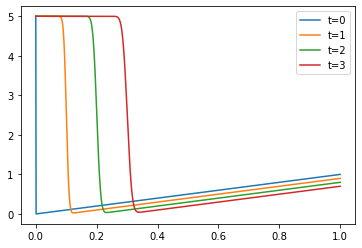

In [80]:
from matplotlib import pyplot as plt
def u0_1(x):
    return(x)
def f1(x):
    return(0)
x2=np.linspace(0,1,1000)
V2=transport_amont(0,1,0.2,5,f1,u0_1,5,999,2001)
V2_0=V2[:,0]
V2_1=V2[:,200]
V2_2=V2[:,400]
V2_3=V2[:,600]
plt.plot(x2,V2_0,label="t=0")
plt.plot(x2,V2_1,label="t=1")
plt.plot(x2,V2_2,label="t=2")
plt.plot(x2,V2_3,label="t=3")
plt.legend()

On constate que cette solution ressemble effectivement à celle donnée par la formule (4).

### Instabilité si la condition CFL n'est pas remplie.

 Ci-dessous nous reprenons l'exemple précédent, mais avec $\Delta x=\frac{1}{100}$ et $\Delta t=\frac{1}{19}$ de sorte que $\frac{\Delta t}{\Delta x}=5+\frac{5}{19}>\frac{1}{c}$, et donc la condition (CFL) (9) n'est pas remplie.

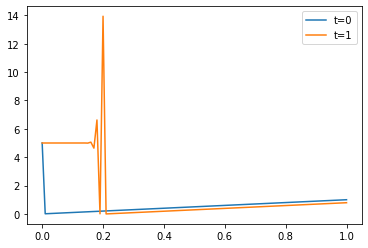

In [81]:
x3=np.linspace(0,1,101)
V3=transport_amont(0,1,0.2,5,f1,u0_1,5,100,96)
V3_0=V3[:,0]
V3_1=V3[:,20]
plt.plot(x3,V3_0,label="t=0")
plt.plot(x3,V3_1,label="t=1")
plt.legend()

On constate effectivement que le schéma est instable.

### Exercices

__Exercice 2__
Soit $c>0$. On suppose maintenant que $\alpha$ et $f$ dépendent du temps, ce qui donne le problème de Cauchy
$$
\left\{ \begin{array}{l l}
\frac{\partial u}{\partial t} (x,t)+ c \frac{\partial u}{\partial x}(x,t)=f(x,t), \qquad \forall (x,t)\in (a,b)\times (0,\infty)\\
u(a,t)=\alpha(t) , \qquad \forall t\in (0,\infty) \\
u(x,0)=u_0(x) , \qquad \forall x\in [a,b]. \\
\end{array} \right.
$$
Adapter le schéma numérique avec dérivée en amont précédent pour pouvoir résoudre numériquement le problème ci-dessus. Tester votre schéma sur l'exemple de votre choix.

__Exercice 3__
On considère l'équation de Burgers pour une solution positive $u\geq 0$
$$
\left\{ \begin{array}{l l}
\frac{\partial u}{\partial t} (x,t)+ u(t,x) \frac{\partial u}{\partial x}(x,t)=0, \qquad \forall (x,t)\in (0,1)\times (0,\infty)\\
u(0,t)=0 , \qquad \forall t\in (0,\infty) \\
u(x,0)=u_0(x) , \qquad \forall x\in [0,1]. \\
\end{array} \right.
$$
__1.__ Adapter le schéma numérique avec dérivée en amont précédent pour pouvoir résoudre numériquement le problème ci-dessus.

__2.__ Tester votre schéma pour $u_0$ croissante. Vous devriez constater que la solution existe pour tout temps $t>0$.

__3.__ Tester votre schéma pour $u_0$ telle que $\frac{d}{dx}u_0$ est assez négatif en un point. Vous devriez contacter qu'il existe un temps $T>0$ pour lequel la dérivée de la solution diverge (la solution devient singulière).

__4.__ Essayer d'expliquer le phénomène vu en __3.__ à l'aide de vos notes de cours sur la méthode des lignes caractéristiques.

## Instabilité pour tous pas de discrétisation d'un schéma aval en espace

On va implémenter un schéma en aval en espace, pour se rendre compte qu'il est toujours instable. __Il faut donc toujours faire le schema precedent avec une derivee en amont pour une equation de transport, et jamais le schéma qui suit avec une dérivée en aval__.

On prend à nouveau $c>0$ et $\alpha\in \mathbb R$. On souhaite résoudre numériquement (5), mais en approximant $\frac{\partial}{\partial x}u(x_i,t_k)$ par différences finies décentrées en aval en espace. Puisque $c>0$, on choisit
$$
\frac{\partial}{\partial x}u(x_i,t_k)=\frac{u(x_{i+1},t_{k})-u(x_{i},t_k)}{\Delta x}+O(\Delta x).
$$
Cette différence finie va faire intervenir $u(x_{i+1})$ dans l'évolution de $u(x_i)$, ce qui est incohérent avec le sens du transport. En combinant ces deux identités et (5) on obtient :
$$
(10)\qquad \frac{u(x_i,t_{k+1})-u(x_i,t_k)}{\Delta t}+c\frac{u(x_{i+1},t_{k})-u(x_{i},t_k)}{\Delta x}=f(x_i)+O(\Delta t+\Delta x)
$$
On voit que pour $i=N-1$ on a un problème car $x_{i+1}=x_N$ n'est pas défini. Le schéma en aval en espace n'est donc déjà même pas bien adapté pour les conditions au bord. On choisit donc une dérivée en amont en ce point : $\frac{u(x_{N-1},t_{k+1})-u(x_{N-1},t_k)}{\Delta t}+c\frac{u(x_{N-1},t_{k})-u(x_{N-2},t_k)}{\Delta x}=f(x_i)+O(\Delta t+\Delta x)$.

On approxime $u(x_i,t_k)$ par $v_{i,k}$. Le schéma est donnée par la suite de vecteurs $(v_{\cdot,k})_{0\leq k \leq K-1}^T$ avec $v_{\cdot,k}^T=(v_{-1,k},v_{0,k},...,v_{N,k})=(\alpha,\tilde V_k^T)$ avec $\tilde V_k=(v_{0,k},...,v_{N-1,k})^T$ solution de :
$$
\left\{ \begin{array}{l l} \tilde V_0=(u_0(x_0),...,u_0(x_{N-1}))^T,\\
\tilde V_{k+1}=\tilde V_k-c \frac{\Delta t}{\Delta x}M\tilde V_k +\Delta t F, 
\end{array} \right.
$$
où :
$$
M=\begin{pmatrix} -1& 1 & & &(0) \\
0&-1&1 & &  \\
&&.&. & \\
 & & &-1& 1 \\
(0)& && -1& 1 \\
\end{pmatrix} , \qquad F=\begin{pmatrix}f(x_0) \\ f(x_1) \\ . \\ f(x_{N-2}) \\ f(x_{N-1})  \end{pmatrix}
$$
La fonction `transport_aval(a,b,c,alpha,T0,f,u0,N,K)` calcule la solution $(\tilde V_k)_{0\leq k \leq K-1}$ par cette méthode :

In [82]:
import numpy as np
def transport_aval(a,b,c,alpha,f,u0,T0,N,K):
    Delta_x=(b-a)/(N)
    Delta_t=T0/(K-1)
    X=np.array([a+(i+1)*Delta_x for i in range(N)])
    F=np.array([f(X[i]) for i in range(N)])
    M=-np.identity(N)+np.eye(N,N,1)
    M[N-1,N-1]=1
    M[N-1,N-2]=-1
    Vtilde=np.zeros([N,K])
    for i in range(N):
        Vtilde[i,0]=u0(X[i])
    for k in range(K-1):
        Vtilde[:,k+1]=Vtilde[:,k]-c*Delta_t/Delta_x*M@Vtilde[:,k]+Delta_t*F
    V=np.zeros([N+1,K])
    V[1:N+1,:]=Vtilde
    for k in range(K-1):
        V[0,k]=alpha
    return(V)

On illustre la fonction `transport_aval` ci-dessous avec $a=0$, $b=1$, $c=0.2$, $\alpha=0$ pour la donnée initiale $u_0(x)=x^2$, et pour un forçage nul $f=0$.

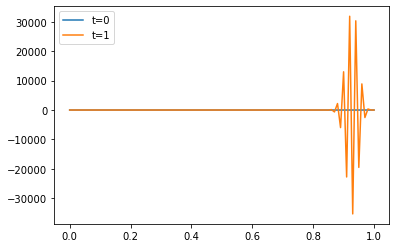

In [83]:
def f4(x):
    return(0)
def u0_4(x):
    return(x**2)
x4=np.linspace(0,1,101)
V4=transport_aval(0,1,0.2,5,f4,u0_4,5,100,96)
V4_0=V4[:,0]
V4_1=V4[:,20]
plt.plot(x4,V4_0,label="t=0")
plt.plot(x4,V4_1,label="t=1")
plt.legend()

## Convergence du schéma numérique par différences finies, avec dérivée en amont en espace

### Stabilité, Consistance, et Convergence

On réécrit le schéma (8) sous la forme
$$
\tilde V_{k+1}= A \tilde V_k+\Delta t F, \qquad A=M=\begin{pmatrix} 1-c\frac{\Delta t}{\Delta x}& 0 & &(0) \\
c\frac{\Delta t}{\Delta x}&1-c\frac{\Delta t}{\Delta x}& 0&  \\
&.&.& \\
(0)& & c\frac{\Delta t}{\Delta x}& 1-c\frac{\Delta t}{\Delta x}
\end{pmatrix}
$$
Nous allons étudier sa stabilité dans $L^\infty$. On pose donc pour $V\in \mathbb R^N$, $|V|_\infty=\max_{0\leq i\leq N-1} |V_i|$.

__Definition.__ On dit que le schéma est stable si pour tout $T_0>0$, il existe une constante $C>0$ telle que pour tout $\Delta t$ et $\Delta x$ assez petits, pour tout $\tilde V_0,F \in \mathbb R^N$, on a pour tout $0\leq k \leq K$ :
$$
|\tilde V_{\cdot,k}|_\infty \leq C\left(  |\tilde V_{\cdot,0}|_\infty+ |\tilde F |_\infty\right)
$$

__Lemme.__ Si $c>0$ (de sorte que le schéma est bien avec des dérivées en amont en espace), et si la condition (CFL) (pour Courant-Friedrich-Lewy) $\frac{\Delta t}{\Delta x}<\frac{1}{c}$ est remplie, alors le schéma est stable.

__Preuve.__ Soit $V\in \mathbb R^n$. Alors pour $i=0$, $(AV)_0=(1-c\frac{\Delta t}{\Delta x})V_0$ et $0<1-c\frac{\Delta t}{\Delta x}<1$ de par la condition (CFL). Donc $|(AV)_0|<|V_0|<|V|_\infty$. Pour $1\leq i\leq N$, $(A V)_i =c\frac{\Delta t}{\Delta x} V_{i-1}+(1-c\frac{\Delta t}{\Delta x})V_{i}$ et donc
\begin{align*}
|(A V)_i | & \leq c\frac{\Delta t}{\Delta x}|V_{i-1}|+(1-c\frac{\Delta t}{\Delta x})|V_i|\\
&\leq c\frac{\Delta t}{\Delta x}|V|_\infty+(1-c\frac{\Delta t}{\Delta x})|V|_\infty \\
&=|V|_\infty
\end{align*}
Donc $ |A V|_\infty\leq V_{\infty}$.

On a alors $|A \tilde V_{k}|_\infty+\Delta t|F|_\infty \leq |\tilde V_k|_\infty+\Delta t|F|_\infty$ et donc
$$
|\tilde V_{k+1}|_\infty \leq |\tilde V_k|_\infty+\Delta t|F|_\infty.
$$
En itérant, $|\tilde V_{k+1}|_\infty \leq |\tilde V_{k-1}|_\infty+2\Delta t|F|_\infty \leq ... \leq |\tilde V_0|_\infty+k\Delta t|F|_\infty$. Comme $K\Delta t= T_0$ on a $|\tilde V_{k+1}|_\infty<|\tilde V_0|_\infty+T_0|F|_\infty$, ce qui démontre le lemme.

__Definition.__ Soit $u$ une solution de (3). Alors l'erreur de consistance au temps $t_k$ est le vecteur $\varepsilon_{\cdot,k}$ où
$$
\varepsilon_{i,k}=u(x_i,t_k)-u(x_i,t_{k+1})-c\Delta t \frac{u(x_i,t_k)-u (x_{i-1},t_k)}{\Delta x}+\Delta t f(x_i,t_k)
$$
On dit qu'un schéma est consistant d'ordre $p$ si pour $u$ une solution de classe $C^{k+1}$ de (3) et $T_0>0$, il existe $C>0$ telle que pour tout $\Delta x$ et $\Delta t$ assez petits :
$$
|\varepsilon_{\cdot,k}|_\infty \leq C\Delta t ((\Delta t)^p+(\Delta x)^p)
$$

__Lemme.__ Le schéma (8) est consistant d'ordre $1$.

__Preuve.__
On a par la formule de Taylor avec reste intégral,
$$
u(x_i,t_{k+1})-u(x_i,t_{k})= \Delta t \frac{\partial u}{\partial t} (x_i,t_k)+\int_{t_k}^{t_{k+1}}(t-t_k) \frac{\partial^2 u}{\partial t^2} u(t,x_i)dt=\Delta t \frac{\partial u}{\partial t} (x_i,t_k)+O((\Delta t)^2)
$$
De même, 
$$
\frac{u(x_i,t_k)-u (x_{i-1},t_k)}{\Delta x}= \frac{\partial}{\partial x} u(x_i,t_k)+O(\Delta x).
$$
Donc
\begin{align*}
\varepsilon_{i,k}= -\Delta t  \frac{\partial u}{\partial t} (x_i,t_k)+O((\Delta t)^2)-\Delta t c\frac{\partial}{\partial x} u(x_i,t_k)+O(\Delta t\Delta x)=O((\Delta t)^2)+O(\Delta t\Delta x)
\end{align*}
d'où le résultat.

__Definition.__ On dit que le schéma est convergent si
$$
\lim_{\Delta x,\Delta t\to 0} \max_{0\leq 1 \leq K, \ 0\leq i \leq N} | u(x_i,t_k)-\tilde V_{i,k}| =0.
$$
On dit qu'il est convergent d'ordre $p$ si pour $u$ une solution de classe $C^{p+1}$, il existe $C>0$ telle que pour $\Delta x$ et $\Delta t $ assez petits,
$$
\max_{0\leq 1 \leq K, \ 0\leq i \leq N} | u(x_i,t_k)-\tilde V_{i,k}| \leq C ((\Delta x)^p+(\Delta x)^p)
$$

__Théorème.__ Le schéma par différences finies, avec dérivées spatiales en amont, est convergent d'ordre $1$.

### Exercices

__Exercice 4.__ Démontrer le théorème de la convergence d'ordre 1 du schéma avec dérivées en amont. Pour cela, reproduisez l'idée de la preuve du théorème de convergence pour le schéma d'Euler explicite de votre cours pour les EDO, en utilisant à nouveau que stabilité + consistance d'ordre p implique convergence d'ordre p, et les lemmes précédents le théorème.